In [ ]:
!pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tbats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

import itertools
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import numpy as np
from pmdarima import auto_arima
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.utilities.dataframe_functions import make_forecasting_frame

from tsfresh.utilities.dataframe_functions import impute
from pylab import rcParams

from statsmodels.tsa.stattools import adfuller

from random import seed
from random import random
from sklearn.metrics import mean_squared_error
from statsmodels.graphics import tsaplots
from tbats import BATS, TBATS
from tsfresh import extract_features

from pmdarima.arima import auto_arima

In [ ]:
dataset= pd.read_csv('https://raw.githubusercontent.com/Nidakhairunnisa/Retail_6/main/Sample%20-%20Superstore.csv', encoding='windows-1254')
dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
dataset['Order Date']=pd.to_datetime(dataset['Order Date'])
dataset['Ship Date']=pd.to_datetime(dataset['Ship Date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
dataset['Order Date'].min(),dataset['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:
sales_data=dataset[['Order Date','Sales']]
sales_data=sales_data.sort_values('Order Date')
sales_data.head()

,Order Date,Sales
7980,2014-01-03,16.448
739,2014-01-04,11.784
740,2014-01-04,272.736
741,2014-01-04,3.540
1759,2014-01-05,19.536


In [ ]:
# lihat penjualan perhari

sales_data=sales_data.groupby(['Order Date'])[['Sales']].sum().reset_index()
sales_data

,Order Date,Sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
...,...,...
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340


In [ ]:
# buatlah tanggal menjadi index
sales_data=sales_data.set_index('Order Date')
sales_data.head(20)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158
2014-01-09,40.544
2014-01-10,54.830
2014-01-11,9.940
2014-01-13,3553.795


Terdapat tanggal yang kosong seperti tanggal 08-01-2014. Hal ini dapat diatasi dengan 2 cara sebagai berikut : 
terdapat dua cara handling data yang kosong
1. Interpolate data
2. Forecast bulanan

Pada enelitian ini akan dilakukan forecasting bulanan, maka dari itu untuk mengatasi tanggal yang kosong penjualannya akan dilakukan downsampling data menjadi data penjualan perbulan.


# Down Sampling Bulanan

In [ ]:
# Down sample to monthly frequency

monthly_sales_data=sales_data.resample('MS').mean()
monthly_sales_data

,Sales
Order Date,
2014-01-01,647.131591
2014-02-01,225.994600
2014-03-01,2320.458708
2014-04-01,1178.972708
2014-05-01,844.581679
2014-06-01,1383.805104
2014-07-01,1414.433042
2014-08-01,1162.894521
2014-09-01,2920.619671


In [ ]:
monthly_sales_data.shape

(48, 1)

## Visualisasi Data Bulanan

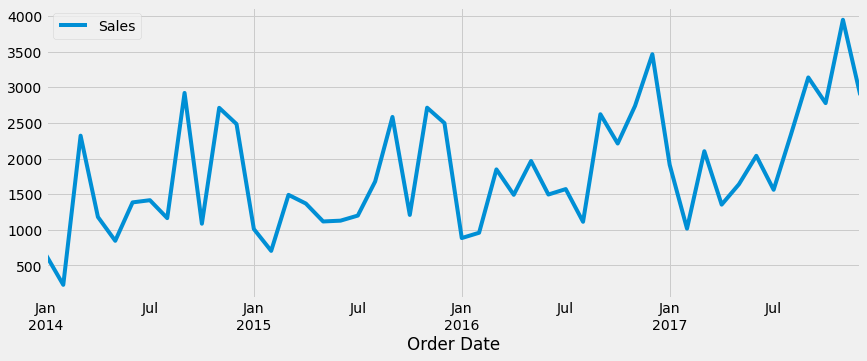

In [ ]:
# analisis menggunakan data bulanan

monthly_sales_data.plot(figsize=(13,5))
plt.show()

## Melihat Pattern Data dan Sesonal Data

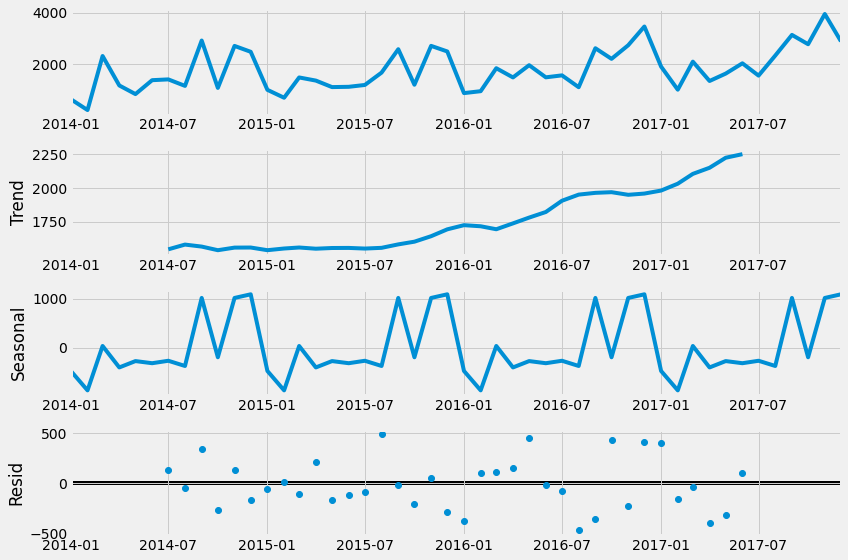

In [ ]:
rcParams['figure.figsize'] = 12, 8

decomposition=sm.tsa.seasonal_decompose(monthly_sales_data,model='addictive')
fig=decomposition.plot()
plt.show()

Dapat dilihat bahwa data yang kita miliki memiliki trend yang naik terus dari tahun ke tahun dan memiliki seasonality. Setiap awal bulan penjualan berada pada titik terendah sedangkan pada akhir tahun penjualan berada pada titik tertinggi.

## Stationaritas Data

Untuk membuat model dengan ARIMA/ SARIMA ada salah satu syarat yang harus dipenuhi yaitu  data yang stationary. Berikut merupakan ciri-ciri data yang stationary : 

1. Weak-form or Covariance stationary
- Constant mean
- Constan variance
- memiliki covariance between period

2. Strick Stationary
- Harus memiliki distribusi yang sama antara 2 periode yang sama panjangnya
- Dalam praktiknya lebih sering dipakai weak form stationary 

3. Ciri- ciri stationer lainnyaa:
- Pengamatan time series data tidak bergantung pada waktunya
-  Tidak memiliki trend dan sesonal effect


### Kenapa kita harus memperhatikan stasionaritas?

1. Stabilitas; Deret waktu stasioner memiliki sifat statistik yang stabil dari waktu ke waktu.

2. Statistical modellig seperti ARIMA mengasumsikan bahwa data time series harus stasioner agar efektif.


### Cara membuat data stasioner

1. Tranformasi data dengan log atau roo. Ini akan menyebabkan berubaha varians

2. Differencing : Y(t)-y(t-1)


Setelah mengetahui ciri ciri data yang stationer, selanjutnya kita akan mencek apakah data kita stationary atau tidak dengan menggunakan  Augmented Dickey Fuller (ADF)



### Testing Stasionality


Test stationality dapat dilakukan menggunakan Augmented Dickey Fuller (ADF)

- H0 : Time series is not statinary
- H1 : time series stationary


Jika p-value<=0.05 (95% confident interfal) maka menolak h0

In [ ]:
result = adfuller(monthly_sales_data.Sales.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))



ADF Statistic: -4.756843
p-value: 0.000066
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


Hasil ADF statistics adalah -4.7 yang memiliki nilai lebih kepci dibandingkan P- value yang memiliki critical value -3.57 (1%). Dapat disimpulkan bahwa data timeseries ini adalah stationary.

## Split Dataset

In [ ]:
train_monthly_sales_data= monthly_sales_data[:-12] 
train_monthly_sales_data

,Sales
Order Date,
2014-01-01,647.131591
2014-02-01,225.994600
2014-03-01,2320.458708
2014-04-01,1178.972708
2014-05-01,844.581679
2014-06-01,1383.805104
2014-07-01,1414.433042
2014-08-01,1162.894521
2014-09-01,2920.619671


In [ ]:
test_monthly_sales_data= monthly_sales_data[-12:]
test_monthly_sales_data

,Sales
Order Date,
2017-01-01,1911.798870
2017-02-01,1015.056670
2017-03-01,2102.584029
2017-04-01,1352.649485
2017-05-01,1639.300378
2017-06-01,2037.758681
2017-07-01,1560.841931
2017-08-01,2337.810667
2017-09-01,3138.094714


## Modelling 

### 1. ARIMA Gridsearch

In [ ]:
p=d=q=range(0,3) 
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [ ]:


bestAIC = np.inf
arima_bestModel = None
for param in pdq:
    print('param:',param)
    try:
        mod = sm.tsa.statespace.SARIMAX(train_monthly_sales_data,
                                        order=param,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False,
                                       trend='c')
        results = mod.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
        if results.aic < bestAIC:
            bestAIC = results.aic
            arima_bestModel = results
            print('****BEST****')
    except:
        continue



param: (0, 0, 0)
ARIMA(0, 0, 0) - AIC:566.9580129005311
****BEST****
param: (0, 0, 1)
ARIMA(0, 0, 1) - AIC:549.2443520248387
****BEST****
param: (0, 0, 2)
ARIMA(0, 0, 2) - AIC:535.1793281931276
****BEST****
param: (0, 1, 0)
ARIMA(0, 1, 0) - AIC:566.725171926813
param: (0, 1, 1)
ARIMA(0, 1, 1) - AIC:532.3530422751372
****BEST****
param: (0, 1, 2)
ARIMA(0, 1, 2) - AIC:519.7639950845916
****BEST****
param: (0, 2, 0)
ARIMA(0, 2, 0) - AIC:584.4291518577882
param: (0, 2, 1)
ARIMA(0, 2, 1) - AIC:533.5340603585751
param: (0, 2, 2)
ARIMA(0, 2, 2) - AIC:510.30071797655864
****BEST****
param: (1, 0, 0)
ARIMA(1, 0, 0) - AIC:567.9259800491783
param: (1, 0, 1)
ARIMA(1, 0, 1) - AIC:552.3757240684904
param: (1, 0, 2)
ARIMA(1, 0, 2) - AIC:537.1929393519002
param: (1, 1, 0)
ARIMA(1, 1, 0) - AIC:559.9140757204864
param: (1, 1, 1)
ARIMA(1, 1, 1) - AIC:534.0010730153795
param: (1, 1, 2)
ARIMA(1, 1, 2) - AIC:520.3854651365805
param: (1, 2, 0)
ARIMA(1, 2, 0) - AIC:568.2704699727927
param: (1, 2, 1)
ARIMA(1, 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 2) - AIC:511.1726744535986
param: (2, 0, 0)
ARIMA(2, 0, 0) - AIC:551.4728589511062
param: (2, 0, 1)
ARIMA(2, 0, 1) - AIC:554.3225824911245
param: (2, 0, 2)
ARIMA(2, 0, 2) - AIC:538.4724087545294
param: (2, 1, 0)
ARIMA(2, 1, 0) - AIC:535.7565310525864
param: (2, 1, 1)
ARIMA(2, 1, 1) - AIC:537.7544106662335
param: (2, 1, 2)
ARIMA(2, 1, 2) - AIC:524.72799630492
param: (2, 2, 0)
ARIMA(2, 2, 0) - AIC:537.2334351272124
param: (2, 2, 1)
ARIMA(2, 2, 1) - AIC:526.549984002066
param: (2, 2, 2)
ARIMA(2, 2, 2) - AIC:512.725270350311


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
arima_bestModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -251.150
Date:                Sat, 23 Jul 2022   AIC                            510.301
Time:                        23:19:36   BIC                            516.037
Sample:                    01-01-2014   HQIC                           512.170
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9796     14.625      0.204      0.839     -25.685      31.644
ma.L1         -1.6193      0.498     -3.253      0.001      -2.595      -0.644
ma.L2          0.6372      0.310      2.052      0.040       0.029       1.246
sigma2      7.781e+05   5.39e+05      1.444      0.149   -2.78e+05    1.83e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.78   Prob(JB):                         0.79
Heteroskedasticity (H):               0.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Auto ARIMA

In [ ]:
autoarima_model = auto_arima(train_monthly_sales_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=603.476, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=586.773, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=601.491, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=573.841, Time=0.19 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=569.767, Time=0.22 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=567.774, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=571.846, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.77 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.70 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 3.702 seconds


In [ ]:
autoarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(3, 2, 0)   Log Likelihood                -279.887
Date:                Sat, 23 Jul 2022   AIC                            567.774
Time:                        23:20:28   BIC                            573.879
Sample:                             0   HQIC                           569.856
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2820      0.173     -7.389      0.000      -1.622      -0.942
ar.L2         -1.0396      0.273     -3.805      0.000      -1.575      -0.504
ar.L3         -0.4294      0.212     -2.024      0.043      -0.845      -0.014
sigma2      8.087e+05   3.16e+05      2.556      0.011    1.89e+05    1.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.41
Prob(Q):                              0.89   Prob(JB):                         0.49
Heteroskedasticity (H):               0.48   Skew:                            -0.15
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###  SARIMA Gridsearch

In [ ]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
bestAIC = np.inf
sarima_bestModel = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_monthly_sales_data, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
     
            if results.aic < bestAIC:
              bestAIC = results.aic
              sarima_bestModel = results
              print('****BEST****')
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:627.559525668064
****BEST****
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:397.1541582950394
****BEST****
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:349.9921516699031
****BEST****
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:174.40634367442556
****BEST****
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:365.9478244284832


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:351.69387216465066
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:188.78787631792724
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:173.82850607164067
****BEST****
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:591.4201005527684
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:370.3852964999549
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:336.71107624506845
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:161.39171811307577
****BEST****
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:367.52274063796665
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:335.83871750367877
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:190.59881924429195
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:161.02883295562708
****BEST****
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:565.0651251530162
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:349.9214622876557
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:349.9729165435047
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:162.75184235411834
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:353.82218690149176
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:338.4938397240489


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:178.28939438746622
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:164.6085410440328
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:533.1405526627262
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:331.9675174142064
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:316.9134758148599
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:144.44099506276038
****BEST****
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:350.90455821554264
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:318.84442884069966
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:173.34872348440723
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:145.70247393195336
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:581.7890595852522
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:366.8531454535883
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:351.9638790906767
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:176.05711780952325
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:352.68987669778124
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:355.0736408455237
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:176.00311058057548
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:175.82

In [ ]:
sarima_bestModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -69.220
Date:                            Sat, 23 Jul 2022   AIC                            144.441
Time:                                    23:21:39   BIC                            145.033
Sample:                                01-01-2014   HQIC                           143.164
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8878      0.817     -1.087      0.277      -2.489       0.713
ma.S.L12      -0.9322      7.309     -0.128      0.899     -15.258      13.393
sigma2       2.14e+05    1.5e+06      0.143      0.887   -2.72e+06    3.15e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.54   Prob(JB):                         0.73
Heteroskedasticity (H):               1.93   Skew:                             0.20
Prob(H) (two-sided):                  0.60   Kurtosis:                         1.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Auto SARIMA

In [ ]:
autosarima_model = auto_arima(train_monthly_sales_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
autosarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=601.491, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=568.177, Time=0.36 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=584.818, Time=0.03 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=570.022, Time=0.75 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=570.049, Time=0.44 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(1,2,0)(2,0,1)[12]             : AIC=inf, Time=1.12 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=586.229, Time=0.12 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=556.252, Time=0.52 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=571.846, Time=0.20 sec
 ARIMA(2,2,0)(2,0,0)[12]             : AIC=557.860, Time=0.87 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=557.749, Time=1.21 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   36
Model:             SARIMAX(3, 2, 0)x(1, 0, 0, 12)   Log Likelihood                -270.831
Date:                            Sat, 23 Jul 2022   AIC                            551.662
Time:                                    23:22:12   BIC                            559.294
Sample:                                         0   HQIC                           554.265
                                             - 36                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3229      0.331     -3.998      0.000      -1.972      -0.674
ar.L2         -1.1318      0.564     -2.007      0.045      -2.237      -0.027
ar.L3         -0.4981      0.356     -1.399      0.162      -1.196       0.200
ar.S.L12       0.8075      0.174      4.640      0.000       0.466       1.149
sigma2      3.139e+05   9.24e+04      3.396      0.001    1.33e+05    4.95e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.98   Prob(JB):                         0.80
Heteroskedasticity (H):               0.98   Skew:                             0.28
Prob(H) (two-sided):                  0.97   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Validation Model

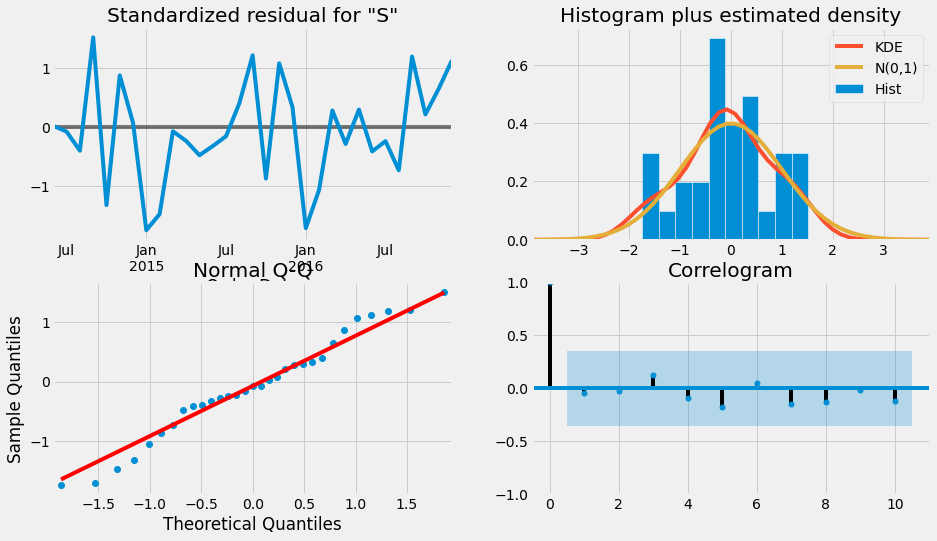

In [ ]:
arima_bestModel.plot_diagnostics(figsize=(14, 8))
plt.show()


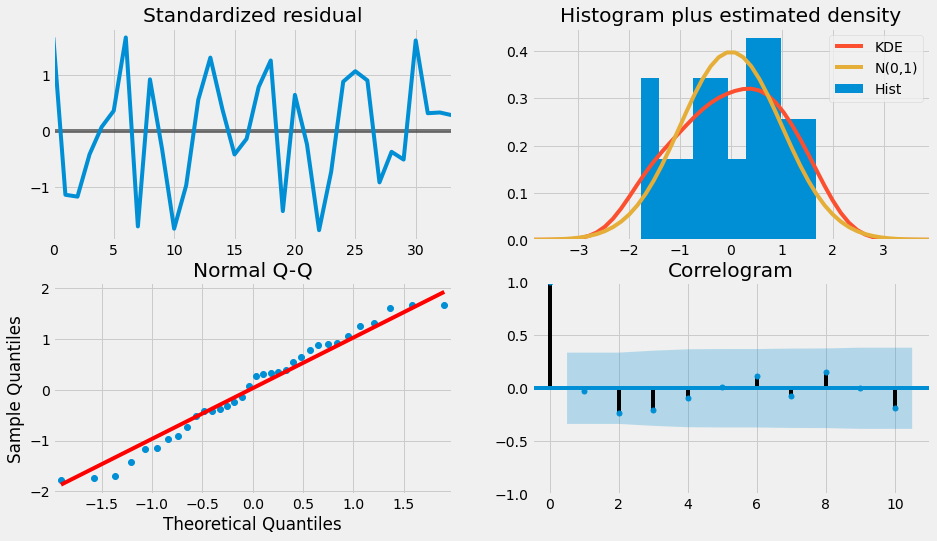

In [ ]:
autoarima_model.plot_diagnostics(figsize=(14, 8))
plt.show()


## Forecasting Model

In [ ]:
#1. predict ARIMA using gridsearch

#in-sample forecasts
arima_is_forecast=arima_bestModel.get_prediction(start=pd.to_datetime('2014-01-01'),dynamic=False)
#out-of-sample forecasts
arima_oos_forecasts =arima_bestModel.get_prediction(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2017-12-01'),dynamic=False)


#forecasted values stored in is_forecasts.predicted_mean
#conf_int contains the confidence intervals

arima_is_forecast_ci=arima_is_forecast.conf_int()
arima_oos_forecasts_ci = arima_oos_forecasts.conf_int()




#2. predict using autoarima

#technical note: the predict() for autoarima lib is different from statsmodel's arima
autoarima_is_forecasts, autoarima_is_forecasts_ci = autoarima_model.predict_in_sample(return_conf_int=True)
autoarima_is_forecasts = pd.Series(autoarima_is_forecasts, index=train_monthly_sales_data.index)
autoarima_is_forecasts_ci = pd.DataFrame(autoarima_is_forecasts_ci,index=train_monthly_sales_data.index)

autorima_oos_forecasts, autoarima_oos_forecasts_ci = autoarima_model.predict(n_periods=12,return_conf_int=True)
#turn it into series so that we could plot easily...
autoarima_oos_forecasts = pd.Series(autorima_oos_forecasts, index=test_monthly_sales_data.index)
autoarima_oos_forecasts_ci = pd.DataFrame(autoarima_oos_forecasts_ci,index=test_monthly_sales_data.index)





#3. predict SARIMA using gridsearch


#in-sample forecasts
sarima_is_forecasts=sarima_bestModel.get_prediction(start=pd.to_datetime('2014-01-01'),dynamic=False)
#out-of-sample forecasts
sarima_oos_forecasts= sarima_bestModel.get_prediction(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2017-12-01'),dynamic=False)


#forecasted values stored in is_forecasts.predicted_mean
#conf_int contains the confidence intervals

sarima_is_forecast_ci=sarima_is_forecast.conf_int()
sarima_oos_forecasts_ci =sarima_oos_forecasts.conf_int()


#4. predict using autosarima

#technical note: the predict() for autoarima lib is different from statsmodel's arima
autosarima_is_forecasts, autosarima_is_forecasts_ci = autosarima_model.predict_in_sample(return_conf_int=True)
autosarima_is_forecasts = pd.Series(autosarima_is_forecasts, index=train_monthly_sales_data.index)
autosarima_is_forecasts_ci = pd.DataFrame(autosarima_is_forecasts_ci,index=train_monthly_sales_data.index)

autosarima_oos_forecasts, autosarima_oos_forecasts_ci = autosarima_model.predict(n_periods = 12, return_conf_int=True)
#turn it into series so that we could plot easily...
autosarima_oos_forecasts = pd.Series(autosarima_oos_forecasts, index=test_monthly_sales_data.index)
autosarima_oos_forecasts_ci = pd.DataFrame(autosarima_oos_forecasts_ci,index=test_monthly_sales_data.index)




In [ ]:
sarima_oos_forecasts_ci

,lower Sales,upper Sales
2017-01-01,301.054034,2421.556714
2017-02-01,17.939948,2111.580578
2017-03-01,1181.955745,3285.217756
2017-04-01,697.540006,2812.975885
2017-05-01,646.530546,2774.160663
2017-06-01,663.026046,2802.783937
2017-07-01,713.244450,2865.061866
2017-08-01,669.161763,2832.971500
2017-09-01,1948.531259,4124.267337
2017-10-01,869.895578,3057.496462


Visualization Model

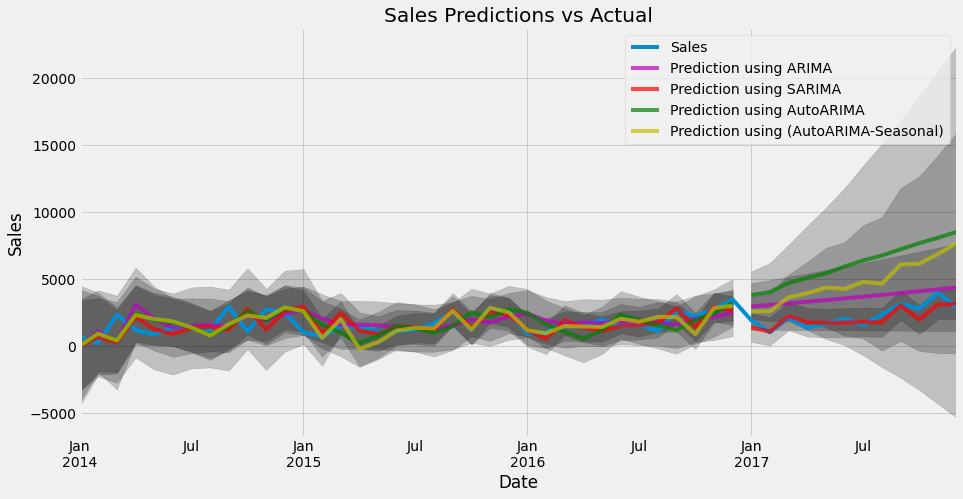

In [ ]:
ax=monthly_sales_data.plot(label='observed')
arima_is_forecast.predicted_mean.plot(ax=ax,  label='_Hidden', alpha=.7, figsize=(14, 7),color='m')
arima_oos_forecasts.predicted_mean.plot(ax=ax, label='Prediction using ARIMA', alpha=.7, figsize=(14, 7),color='m')

sarima_is_forecasts.predicted_mean.plot(ax=ax, label='_Hidden', alpha=.7, figsize=(14, 7),color='r')
sarima_oos_forecasts.predicted_mean.plot(ax=ax, label='Prediction using SARIMA', alpha=.7, figsize=(14, 7),color='r')

autoarima_is_forecasts.plot(ax=ax, label='_Hidden', alpha=.7, figsize=(14, 7),color='g')
autoarima_oos_forecasts.plot(ax=ax, label='Prediction using AutoARIMA', alpha=.7, figsize=(14, 7),color='g')


autosarima_is_forecasts.plot(ax=ax, label='_Hidden', alpha=.7, figsize=(14, 7),color='y')
autosarima_oos_forecasts.plot(ax=ax, label='Prediction using (AutoARIMA-Seasonal)', alpha=.7, figsize=(14, 7),color='y')

#arima gridsearch
ax.fill_between(arima_is_forecast_ci.index,
               arima_is_forecast_ci.iloc[:, 0],
               arima_is_forecast_ci.iloc[:, 1], color='k', alpha=.2)
ax.fill_between(arima_oos_forecasts_ci.index,
               arima_oos_forecasts_ci.iloc[:, 0],
               arima_oos_forecasts_ci.iloc[:, 1], color='k', alpha=.2)

#sarima gridserach
ax.fill_between(sarima_is_forecast_ci.index,
               sarima_is_forecast_ci.iloc[:, 0],
               sarima_is_forecast_ci.iloc[:, 1], color='k', alpha=.2)
ax.fill_between(sarima_oos_forecasts_ci.index,
               sarima_oos_forecasts_ci.iloc[:, 0],
               sarima_oos_forecasts_ci.iloc[:, 1], color='k', alpha=.2)

#autosarima
ax.fill_between(autosarima_is_forecasts_ci.index,
               autosarima_is_forecasts_ci.iloc[:, 0],
               autosarima_is_forecasts_ci.iloc[:, 1], color='k', alpha=.2)
ax.fill_between(autosarima_oos_forecasts_ci.index,
               autosarima_oos_forecasts_ci.iloc[:, 0],
               autosarima_oos_forecasts_ci.iloc[:, 1], color='k', alpha=.2)


#autoarima
ax.fill_between(autoarima_is_forecasts_ci.index,
               autoarima_is_forecasts_ci.iloc[:, 0],
               autoarima_is_forecasts_ci.iloc[:, 1], color='k', alpha=.2)
ax.fill_between(autoarima_oos_forecasts_ci.index,
               autoarima_oos_forecasts_ci.iloc[:, 0],
               autoarima_oos_forecasts_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.title('Sales Predictions vs Actual')
plt.legend()
plt.show()



Berdasarkan hasil visualisasi, model yang paling baik memprediksi nilai sales adalah SARIMA dengan order (0, 1, 1)x(0, 1, 1, 12)

## Quantitive Prediction 

In [ ]:
# 1. ARIMA gridsearch
y_forecasted = arima_oos_forecasts.predicted_mean
y_truth = monthly_sales_data['2017-01-01':]
mse = ((y_forecasted - y_truth.iloc[:,0]) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 2228191.76
The Root Mean Squared Error of our forecasts is 1492.71


In [ ]:
#2. autoarima
y_forcested=autoarima_oos_forecasts
y_truth=monthly_sales_data['2017-01-01':]
mse=((y_forcested-y_truth.iloc[:,0])**2).mean()


print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 16128191.35
The Root Mean Squared Error of our forecasts is 4015.99


In [ ]:
#3. sarima Gridseaech

y_forcested=sarima_oos_forecasts.predicted_mean
y_truth=monthly_sales_data['2017-01-01':]
mse=((y_forcested-y_truth.iloc[:,0])**2).mean()


print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 204926.56
The Root Mean Squared Error of our forecasts is 452.69


In [ ]:
#3. autosarima

y_forecasted = autosarima_oos_forecasts.values
y_truth = monthly_sales_data['2017-01-01':]
mse = ((y_forecasted - y_truth.iloc[:,0]) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 7554790.96
The Root Mean Squared Error of our forecasts is 2748.6


Selanjutnya dilakukan evaluasi dengan menggunakan MSE dan RMSE. Didapatkan model terbaik dengan  nilai MSE dan RMSE terkecil adalah sarima dnegan MSE :  204926 dan RMSE : 452.

## Hasil Prediksi menggunakan SARIMA

In [ ]:
sarima_predict_in=pd.DataFrame(sarima_is_forecasts.predicted_mean)
sarima_predict_in

,predicted_mean
Order Date,
2014-01-01,0.000000
2014-02-01,647.131591
2014-03-01,262.132603
2014-04-01,2155.205011
2014-05-01,1257.315235
2014-06-01,877.703403
2014-07-01,1343.190619
2014-08-01,1408.715862
2014-09-01,1182.621598


In [ ]:
sarima_predict_out=pd.DataFrame(sarima_oos_forecasts.predicted_mean)
sarima_predict_out

,predicted_mean
2017-01-01,1361.305374
2017-02-01,1064.760263
2017-03-01,2233.586750
2017-04-01,1755.257945
2017-05-01,1710.345604
2017-06-01,1732.904991
2017-07-01,1789.153158
2017-08-01,1751.066631
2017-09-01,3036.399298
2017-10-01,1963.696020


In [ ]:
sarima_predict=pd.concat([sarima_predict_in,sarima_predict_out])
sarima_predict

,predicted_mean
2014-01-01,0.000000
2014-02-01,647.131591
2014-03-01,262.132603
2014-04-01,2155.205011
2014-05-01,1257.315235
2014-06-01,877.703403
2014-07-01,1343.190619
2014-08-01,1408.715862
2014-09-01,1182.621598
2014-10-01,2781.145933


In [ ]:
sarima_predict=pd.concat([monthly_sales_data,sarima_predict],axis=1)
sarima_predict

,Sales,predicted_mean
2014-01-01,647.131591,0.000000
2014-02-01,225.994600,647.131591
2014-03-01,2320.458708,262.132603
2014-04-01,1178.972708,2155.205011
2014-05-01,844.581679,1257.315235
2014-06-01,1383.805104,877.703403
2014-07-01,1414.433042,1343.190619
2014-08-01,1162.894521,1408.715862
2014-09-01,2920.619671,1182.621598
2014-10-01,1084.599759,2781.145933
